In [3]:
# google colab Mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# tf 불러오기
import tensorflow as tf
from tensorflow.keras import Input, models, layers
from nltk.tokenize import word_tokenize  

In [2]:
# 파이썬 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import pandas as pd
import random

In [3]:
# csv 파일 읽어오기

train = pd.read_csv("/content/drive/MyDrive/homework_1/emnist-letters-train.csv", header=None, index_col=False)
test = pd.read_csv("/content/drive/MyDrive/homework_1/emnist-letters-test.csv", header=None, index_col=False)

In [4]:
# y_train, y_test은 1개의 레이블 데이터셋, 1부터 26까지 26개의 철자
x_train, y_train = train.drop([0], axis = 1), train[0]
x_test, y_test = test.drop([0], axis = 1), test[0]

In [5]:
# 각 데이터 포인트는 0~784 사이 값을 가지고 있어 Normalization 해줘야한다.
x_train, x_test = x_train / 784.0, x_test / 784.0

In [6]:
# tf.reshape
x_train = tf.reshape(x_train, (88800, 28, 28, 1))
x_test = tf.reshape(x_test, (14800, 28, 28, 1))

y_train = tf.reshape(y_train, (88800, 1, 1, 1))
y_test = tf.reshape(y_test, (14800, 1, 1, 1))

In [7]:
# Model
# Conv2D layer에서, 7 by 7 size의 kernel 사용
# Maxpooling layer에서 5 by 5 size의 kernel 사용
# Conv2D layer와 Maxpooling layer를 각각 2개 이상 사용

# 3개, 2개 학습했을 때에 비해 2개, 2개로 학습했을 때가 더 정확도가 높아 2개 2개 사용

model = models.Sequential()

model.add(layers.Conv2D(10, (7, 7), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((5, 5), strides=1))

model.add(layers.Conv2D(10, (7, 7), activation='relu'))
model.add(layers.MaxPooling2D((5, 5), strides=1))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(27, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 10)        500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 18, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 10)        4910      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               82048     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [8]:
# 모델 컴파일

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# 모델 학습

model.fit(x_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
888/888 [==============================] - 100s 112ms/step - loss: 1.1078 - accuracy: 0.0447
Epoch 2/10
888/888 [==============================] - 100s 112ms/step - loss: 0.5484 - accuracy: 0.0463
Epoch 3/10
888/888 [==============================] - 99s 112ms/step - loss: 0.4589 - accuracy: 0.0467
Epoch 4/10
888/888 [==============================] - 99s 111ms/step - loss: 0.4170 - accuracy: 0.0466
Epoch 5/10
888/888 [==============================] - 99s 111ms/step - loss: 0.3841 - accuracy: 0.0468
Epoch 6/10
888/888 [==============================] - 99s 111ms/step - loss: 0.3691 - accuracy: 0.0469
Epoch 7/10
888/888 [==============================] - 99s 111ms/step - loss: 0.3514 - accuracy: 0.0470
Epoch 8/10
888/888 [==============================] - 98s 111ms/step - loss: 0.3399 - accuracy: 0.0469
Epoch 9/10
888/888 [==============================] - 98s 111ms/step - loss: 0.3298 - accuracy: 0.0470
Epoch 10/10
888/888 [==============================] - 98s 110ms/step -

In [10]:
# 모델 정확도 및 loss 확인

model.evaluate(x_test,  y_test, verbose=10)

[0.3244353234767914, 0.890515148639679]

In [11]:
# test data 셋에서 무작위 데이터 10개를 구현한 모델로 예측

random_data_10 = random.sample(range(14800), 10)
print(random_data_10)

[3972, 10733, 4897, 5426, 7985, 14790, 2580, 10530, 7309, 9568]


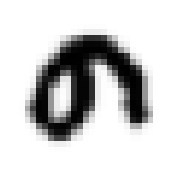

Predicted value :  E


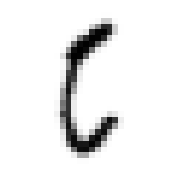

Predicted value :  N


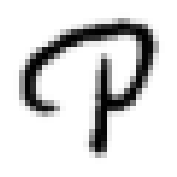

Predicted value :  G


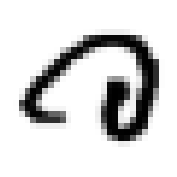

Predicted value :  G


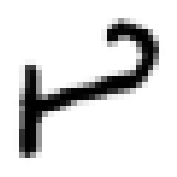

Predicted value :  J


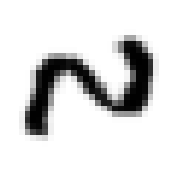

Predicted value :  S


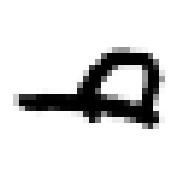

Predicted value :  D


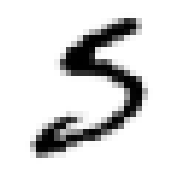

Predicted value :  N


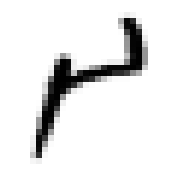

Predicted value :  J


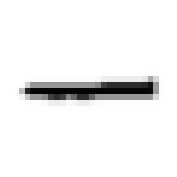

Predicted value :  L


In [12]:
# 예측한 data의 accuracy를 출력
# 예측한 값과 test data를 pyplot으로 출력
model_predicted = model.predict(x_test, verbose=0).argmax(axis = 1)
alphabet = [chr(i) for i in range(65, 91)]
for num in range(10):
  fig = plt.figure(figsize = (10,3))
  image = x_test[random_data_10[num]]
  plt.imshow(image[:,:,0],cmap='Greys')
  plt.axis('off')
  plt.show()
  print("Predicted value : ", alphabet[model_predicted[random_data_10[num]]-1])